In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [278]:
x=np.random.rand(400)
y=np.random.rand(400)

In [279]:
x_train=np.vstack([x,y])

In [280]:
x=np.random.rand(100)
y=np.random.rand(100)
x_test=np.vstack([x,y])

In [281]:
train_label=np.ones(400)
for i in range(400):
    if ((x_train[0,i] < 0.5) & (x_train[1,i] < 0.5)) | ((x_train[0,i] > 0.5) & (x_train[1,i] > 0.5)):
        train_label[i]=0

In [282]:
test_label=np.ones(100)
for i in range(100):
    if ((x_test[0,i] < 0.5) & (x_test[1,i] < 0.5)) | ((x_test[0,i] > 0.5) & (x_test[1,i] > 0.5)):
        test_label[i]=0

In [283]:
x_train=x_train.T
y_train=train_label.reshape(400,1)

In [284]:
x_test=x_test.T
y_test=test_label.reshape(100,1)

In [285]:
Class_0_indices=train_label==0
Class_1_indices=train_label==1

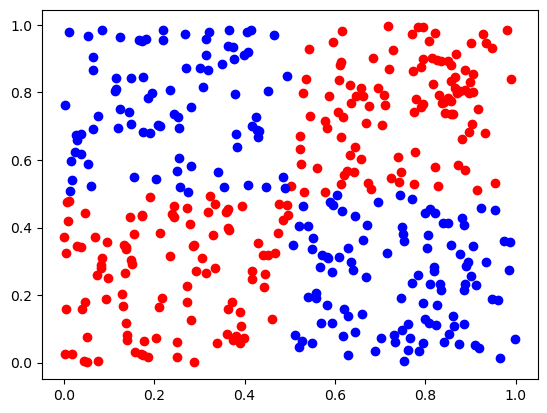

In [286]:
plt.scatter(x_train[Class_0_indices,0],x_train[Class_0_indices,1],color='r')
plt.scatter(x_train[Class_1_indices,0],x_train[Class_1_indices,1],color='b')
plt.show()

In [287]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [288]:
hidden_bias=np.random.rand(3)

In [289]:
hidden_weights=np.random.rand(2,3)

In [290]:
op_weight=np.random.rand(3,1)
op_bias=np.random.rand(1)

In [291]:
def forward(x):
    '''
    input shape [2, number of obs]
    '''
    hidden=x@hidden_weights+hidden_bias
    activated_hidden=sigmoid(hidden)
    output=sigmoid(activated_hidden@op_weight+op_bias)
    return activated_hidden,output

In [292]:
forward(x_train)

def backward_propagation(x_train, y_train, activated_hidden, output, learning_rate):
    m = x_train.shape[0]
    global op_weight,op_bias,hidden_weights,hidden_bias
    # Calculate gradients for the output layer
    doutput_hid = output - y_train
    dop_weight = np.dot(activated_hidden.T, doutput_hid) / m
    dop_bias = np.sum(doutput_hid, axis=0) / m
    
    # Update parameters
    op_weight -= learning_rate * dop_weight
    op_bias -= learning_rate * dop_bias
    
    # Calculate gradients for the hidden layer
    dact_hid = np.dot(doutput_hid, op_weight.T) * (activated_hidden * (1 - activated_hidden))
    dhid_wt = np.dot(x_train.T, dact_hid) / m
    dhid_bias = np.sum(dact_hid, axis=0) / m


    hidden_weights -= learning_rate * dhid_wt
    hidden_bias -= learning_rate * dhid_bias

In [293]:
epochs=10000
for i in range(epochs):
    backward_propagation(x_train, y_train, forward(x_train)[0], forward(x_train)[1], 1)
    if i%1000==0:
        print(f"Epoch {i}: Epoch Loss {-np.mean(y_train * np.log(forward(x_train)[1]) + (1 - y_train) * np.log(1 - forward(x_train)[1]))}")

Epoch 0: Epoch Loss 0.714143561486494
Epoch 1000: Epoch Loss 0.5534835300888508
Epoch 2000: Epoch Loss 0.4564577293516341
Epoch 3000: Epoch Loss 0.36127754752335256
Epoch 4000: Epoch Loss 0.1651785682363488
Epoch 5000: Epoch Loss 0.14763371319223478
Epoch 6000: Epoch Loss 0.1379390583201699
Epoch 7000: Epoch Loss 0.13097700531901477
Epoch 8000: Epoch Loss 0.12551379776328125
Epoch 9000: Epoch Loss 0.12109762670847111


In [294]:
a1, a2 = forward(x_train)
predictions = (a2 > 0.5).astype(int)
accuracy = np.mean(predictions == y_train)
print(f"Accuracy on training set: {accuracy * 100}%")

Accuracy on training set: 96.0%


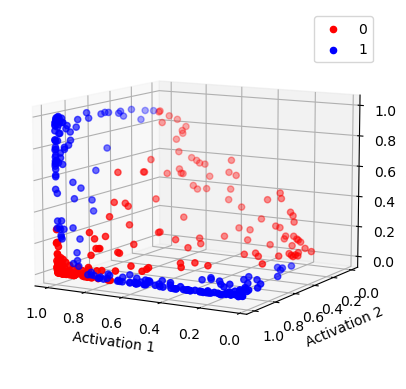

In [295]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the hidden layer activations with color coding based on labels
zero_ind=(y_train == 0).reshape(400,)
one_ind=(y_train == 1).reshape(400,)
ax.scatter(a1[zero_ind][:,0], a1[zero_ind][:,1], a1[zero_ind][:,2], c='red', label='0')
ax.scatter(a1[one_ind][:,0], a1[one_ind][:,1], a1[one_ind][:,2], c='blue', label='1')

ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.view_init(10,120)
ax.legend()

plt.show()

**It looks like the points have become linearly separable**

In [296]:
a1, a2 = forward(x_test)
predictions = (a2 > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on test set: {accuracy * 100}%")

Accuracy on test set: 90.0%


# Problem 2

# (a)

In [273]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int32)

In [274]:
# Split the data into training and testing sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [110]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [111]:
hidden_nodes = [10, 50, 100, 200]

# Train and evaluate MLP classifier for different numbers of nodes

# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Calculate class-wise F1-scores
f1_scores = f1_score(y_test, y_pred, average=None)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Number of nodes in hidden layer: {nodes}")
print("Class-wise F1-scores:")
for class_label, f1_score in enumerate(f1_scores):
    print(f"Class {class_label}: {f1_score:.4f}")
print(f"Overall Accuracy: {accuracy:.4f}")
print()

Number of nodes in hidden layer: 10
Class-wise F1-scores:
Class 0: 0.9402
Class 1: 0.9572
Class 2: 0.8880
Class 3: 0.8749
Class 4: 0.9111
Class 5: 0.8420
Class 6: 0.9337
Class 7: 0.9221
Class 8: 0.8648
Class 9: 0.8925
Overall Accuracy: 0.9043



TypeError: 'numpy.float64' object is not callable

In [113]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(20,),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.91      0.90      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.94      0.89      0.92       892
           6       0.96      0.94      0.95       958
           7       0.96      0.93      0.95      1028
           8       0.89      0.91      0.90       974
           9       0.91      0.94      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [114]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.91      0.96      0.94      1010
           4       0.95      0.96      0.96       982
           5       0.96      0.92      0.94       892
           6       0.96      0.95      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [115]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.95      0.95       892
           6       0.98      0.95      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Observation:  
* As the number of layers increased, the model's accuracy started increasing.
* It took longer time to train

# (b)

In [116]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,20),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.96      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.88      0.89      1010
           4       0.93      0.94      0.93       982
           5       0.95      0.88      0.91       892
           6       0.87      0.97      0.92       958
           7       0.95      0.93      0.94      1028
           8       0.85      0.88      0.86       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [117]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(20,30,40),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.91      0.92      1010
           4       0.92      0.96      0.94       982
           5       0.94      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.94      0.94      0.94      1028
           8       0.89      0.93      0.91       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [275]:
# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Remark:**  
* The best performance on the MNIST dataset is achieved for the above model with 3 hidden layers, each layer containing 100 nodes. The accuracy is 98%.